# Análise de dados de dispositivos inteligentes Bellabet
#### Estudo de caso do projeto final do Certificado Profissional de Análise de Dados do Google

A Bellabet é uma fabricante de produtos de alta tecnologia voltados para a saúde das mulheres, que coleta dados sobre atividades, sono, estresse e saúde reprodutiva. Analisaremos os dados de alguns desses usuários para responder as seguintes questões:

1.	Quais são algumas das tendências no uso de dispositivos inteligentes?
2.	Como essas tendências podem se aplicar aos clientes da Bellabeat?
3.	Como essas tendências podem ajudar a influenciar a estratégia de marketing da Bellabeat?

#### Dados

Os [dados][1] são de domínio público. São informações do rastreador de condicionamento físico FitBit, que incluem informações sobre 30 usuários elegíveis que consentiram com o envio dos dados de condicionamento físico, incluindo dados de monitoramento de atividade física, frequência cardíaca, sono e afins. Dados que podem ser usados para explorar os hábitos dos usuários.

#### Início da análise

1. Importação dos pacotes a serem utilizados ao longo da análise.

[1]: https://www.kaggle.com/datasets/arashnic/fitbit

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2. Importação dos dados a serem utilizados ao longo da análise. Os dados já estão limpos.

In [2]:
daily_steps = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
daily_calo = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_inte = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
sleep_day = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight_log = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

3. Começaremos analisando os exercícios/atividades diárias, dessa forma utilizaremos os dados da tabela 'daily_inte'.

In [3]:
daily_inte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


4. Após verificar as colunas e os tipos de dados presentes, criaremos uma coluna nova chamada 'TotalActiveMinutes' que somará as 3 colunas de atividades 'LightlyActiveMinutes', 'FairlyActiveMinutes' e 'VeryActiveMinutes' e então faremos dois gráficos de pizza, o primeiro para mostrar a porcentagem entre atividades diárias e tempo ocioso ('SedentaryMinutes'), e o segundo para mostrar a porcentagem de cada intensidade de atividade feita por dia (Nos dois utilizamos a média dos dados oferecidos).

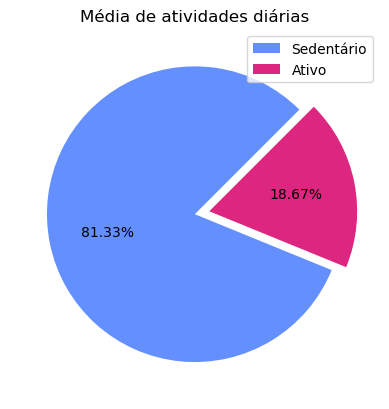

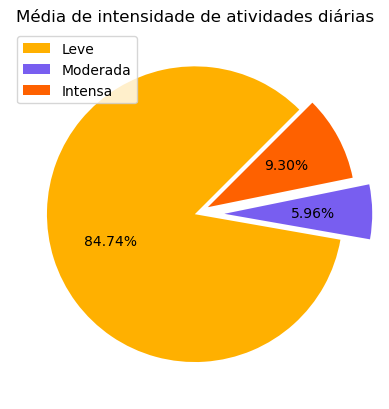

In [4]:
# Gráfico em pizza com as porcentagens dos minutos 'Active' e 'Sedentary'
daily_inte['TotalActiveMinutes'] = daily_inte['LightlyActiveMinutes'] + daily_inte['FairlyActiveMinutes'] + daily_inte['VeryActiveMinutes']
daily_inte_sen_act = daily_inte[['SedentaryMinutes','TotalActiveMinutes']].agg('mean')
plt.pie(daily_inte_sen_act,autopct="%.2f%%",explode=(0,0.1),colors=['#648FFF','#DC267F'],startangle=45)
plt.legend(['Sedentário','Ativo'])
plt.title('Média de atividades diárias')
plt.show()

# Gráfico em pizza com as pocrentagens de cada atividade 
daily_inte_total = daily_inte[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']].agg('mean')
plt.pie(daily_inte_total,autopct='%.2f%%',colors=['#FFB000','#785EF0','#FE6100'],explode=(0,0.2,0.1),startangle=45)
plt.title('Média de intensidade de atividades diárias')
plt.legend(['Leve','Moderada','Intensa'])
plt.show()

5. Podemos observar no primeiro gráfico, como esperado que o tempo ocioso é maior do que o tempo em atividade, pois está incluído o tempo de sono. No segundo gráfico podemos observar que a maior porcentagem se dá a atividades leves ('LightlyActiveMinutes'), o que pode indicar que os usuários observados são pessoas que fazem exercício de forma casual, ou seja, é provavél que não sejam profissionais. Abaixo podemos ver que a média de atividades por dia é de 227,54 minutos (aproximadamente 3 horas e 48 minutos).

In [5]:
daily_inte['TotalActiveMinutes'].describe()

count    940.000000
mean     227.542553
std      121.776307
min        0.000000
25%      146.750000
50%      247.000000
75%      317.250000
max      552.000000
Name: TotalActiveMinutes, dtype: float64

6. Ainda utilizando os dados 'daily_inte' criaremos uma nova coluna 'DayOfWeek' utilizando dados da coluna 'ActivityDay' para que possamos extrair qual dia da semana pertence o dado. Depois agruparemos por dia da semana e plotaremos um gráfico em barra para ver se há alguma diferença nas horas de atividades dependendo dos dias em que são feitas.

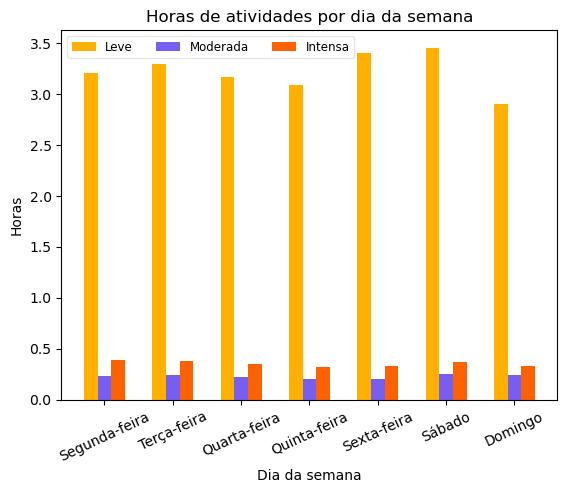

In [6]:
daily_inte['ActivityDay'] = pd.to_datetime(daily_inte['ActivityDay'])
daily_inte['DayOfWeek'] = pd.DatetimeIndex(daily_inte['ActivityDay']).dayofweek
daily_inte_grouped = daily_inte.groupby('DayOfWeek')[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']].agg('mean')
plt.bar(np.arange(7)-0.2,daily_inte_grouped['LightlyActiveMinutes']/60,width=0.2,label='Leve',color='#FFB000')
plt.bar(np.arange(7),daily_inte_grouped['FairlyActiveMinutes']/60,width=0.2,label='Moderada',color='#785EF0')
plt.bar(np.arange(7)+0.2,daily_inte_grouped['VeryActiveMinutes']/60,width=0.2,label='Intensa',color='#FE6100')
plt.xticks(np.arange(7),['Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira','Sexta-feira','Sábado','Domingo'],rotation=25)
plt.legend(framealpha=0.5,ncol=3,fontsize=8.5)
plt.title('Horas de atividades por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Horas')
plt.show()


7. Podemos ver que não há muita diferença nas atividades 'FairlyActiveMinutes'(Moderada) e 'VeryActiveMinutes'(Intensa), e mesmo a atividade 'LightlyActiveMinutes'(Leve) teve poucas mudanças, podemos ver um certo aumento na Sexta-feira e no Sábado e uma diminuição considerável no Domingo.

In [7]:
daily_calo.info()
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


8. Vamos agora ver a relação entre calorias e peso, primeiro passo é verificar quantos dados únicos temos nessas duas categorias, já vimos pelas informações anteriores que há uma diferença na quantidade dos dados das duas tabelas. Usaremos duas tabelas, 'daily_calo' e 'weight_log'.

In [8]:
print(len(daily_calo['Id'].unique()))
print(len(weight_log['Id'].unique()))

33
8


9. O código acima nos mostra que temos 33 usuários únicos com dados sobre as calorias diárias e 8 usuários únicos com dados sobre pesos. Apesar de não ser um número grande o suficiente para tirarmos conclusões, iremos analisar. Próximo passo é criar uma nova coluna 'ActivityDay' na tabela 'weight_log', proveniente da coluna 'Date' mas com outra formatação, e mudar a formatação da coluna 'ActivityDay' da tabela 'daily_calo'.

In [9]:
daily_calo['ActivityDay'] = pd.to_datetime(daily_calo['ActivityDay'])
weight_log['ActivityDay'] = pd.to_datetime(weight_log['Date']).dt.normalize()

10. Após isso filtraremos ('daily_calo_filtered') para que possamos correlacionar as duas tabelas, tiraremos os usuários que não possuem dados de peso e só ficaremos com aqueles que tem e então mesclaremos essa tabela e armazenaremos em 'calo_weight'.

In [10]:
daily_calo_filtered= daily_calo[daily_calo['Id'].isin(weight_log['Id'].unique().tolist())]
calo_weight = daily_calo_filtered.merge(weight_log,on=['Id','ActivityDay'],how='outer')
calo_weight.groupby('Id')['WeightKg'].agg(['count','max','min'])

,count,max,min
Id,,,
1503960366,2,52.599998,52.599998
1927972279,1,133.500000,133.500000
2873212765,2,57.299999,56.700001
4319703577,2,72.400002,72.300003
4558609924,5,70.300003,69.099998
5577150313,1,90.699997,90.699997
6962181067,30,62.500000,61.000000
8877689391,24,85.800003,84.000000


11. Podemos observar após fazer a filtragem e alguns cálculos que 6 dos 8 usuários tem poucos registros de peso, além de pouca variação, logo utilizaremos de exemplo os dois usuários que mais tem registro e variação de peso ('6962181067' e '8877689391'). Novamente reitero que não é a melhor prática considerando que a amostra não abrange suficientes dados para uma conclusão concreta.

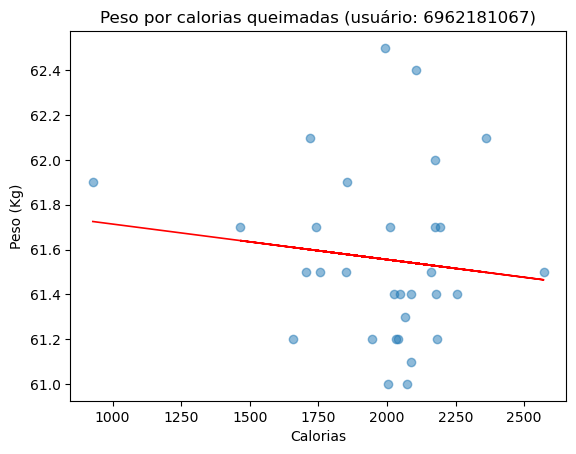

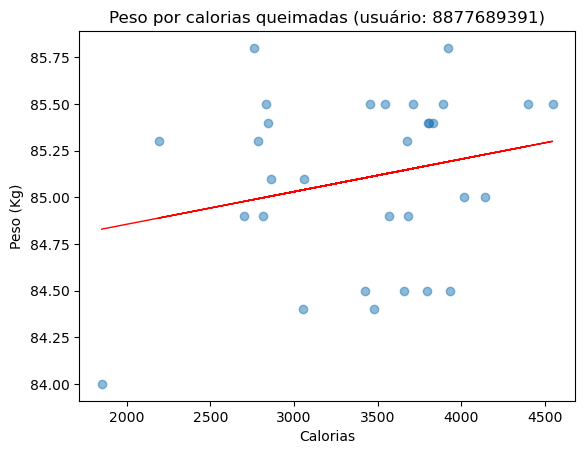

In [11]:
# Usuário 6962181067
y = calo_weight.query('Id == 6962181067')['WeightKg'].ffill()
x = calo_weight.query('Id == 6962181067')['Calories']
plt.scatter(x, y, alpha=0.5)
b, a = np.polyfit(x, y, deg=1)                                                                                              
plt.plot(x, a + b * x, color="red", lw=1.2)
plt.title('Peso por calorias queimadas (usuário: 6962181067)')
plt.ylabel('Peso (Kg)')
plt.xlabel('Calorias')
plt.show()

# Usuário 8877689391
y_2 = calo_weight.query('Id == 8877689391')['WeightKg'].ffill()
x_2 = calo_weight.query('Id == 8877689391')['Calories']
plt.scatter(x_2, y_2, alpha=0.5)
d, c = np.polyfit(x_2, y_2, deg=1)                                                                                              
plt.plot(x_2, c + d * x_2, color="red", lw=1)
plt.title('Peso por calorias queimadas (usuário: 8877689391)')
plt.ylabel('Peso (Kg)')
plt.xlabel('Calorias')
plt.show()



12. Os dados foram plotados e como podemos observar os dois usuários tem comportamentos levemente diferentes, e não suficientes para inferir uma conclusão, o usuário '6962181067' teve uma grande variação de peso, a linha vermelha indica uma correlação negativa fraca, ou seja quanto mais calorias queimadas menos peso, já o usuário '8877689391' apresenta um aumento de peso e de calorias queimadas, indicando uma correlação positiva fraca (também indicada pela linha vermelha de correlação). Para podermos tirar uma conclusão precisaríamos de mais dados sobre calorias queimadas, calorias consumidas e peso, além de outras informações como objetivo (ganho de massa muscular, perda de peso e afins).

In [12]:
print(len(daily_steps['Id'].unique()))
print(len(daily_calo['Id'].unique()))


33
33


13. Agora iremos correlacionar os dados de calorias 'daily_calo' com os dados de passos 'daily_steps', como vemos acima temos 33 usuários únicos nas duas tabelas. Mesclaremos os dados para uma única tabela 'calo_step' e faremos um gráfico.

In [13]:
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'])
calo_step = daily_steps.merge(daily_calo,how='inner',on=['Id','ActivityDay'])
calo_step.describe()

,Id,StepTotal,Calories
count,9.400000e+02,940.000000,940.000000
mean,4.855407e+09,7637.910638,2303.609574
std,2.424805e+09,5087.150742,718.166862
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,3789.750000,1828.500000
50%,4.445115e+09,7405.500000,2134.000000
75%,6.962181e+09,10727.000000,2793.250000
max,8.877689e+09,36019.000000,4900.000000


14. Podemos observar que existem alguns valores nulos (0), que podem ser erros de registro ou o usuário não estava utilizando o dispositivo, iremos filtrar esses dados.

In [14]:
calo_step = calo_step.query('StepTotal > 10 & Calories > 0')
calo_step.describe()

,Id,StepTotal,Calories
count,8.600000e+02,860.000000,860.000000
mean,4.862318e+09,8348.389535,2364.253488
std,2.417368e+09,4727.704577,702.009824
min,1.503960e+09,16.000000,52.000000
25%,2.320127e+09,4932.000000,1859.750000
50%,4.445115e+09,8056.500000,2221.500000
75%,6.962181e+09,11100.250000,2833.000000
max,8.877689e+09,36019.000000,4900.000000


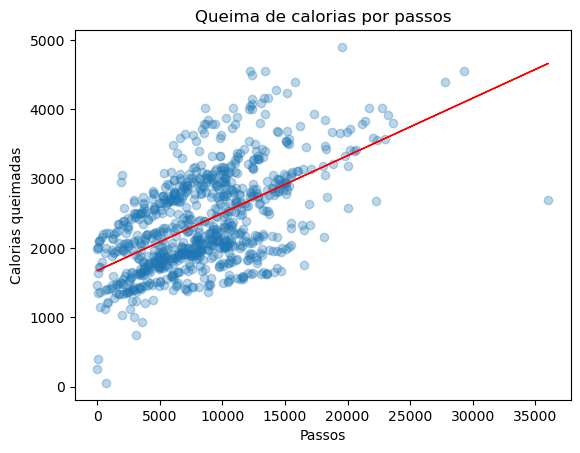

In [15]:
x_3 = calo_step['StepTotal']
y_3 = calo_step['Calories']
plt.scatter(x_3, y_3,alpha=0.3)
f, e = np.polyfit(x_3, y_3, deg=1)                                                                                              
plt.plot(x_3, e + f * x_3, color="red", lw=1)
plt.xlabel('Passos')
plt.ylabel('Calorias queimadas')
plt.title('Queima de calorias por passos')
plt.show()

15. Podemos observar acima que calorias e passos tem uma correlação positiva, indicada pela linha vermelha, então é provável que se o usuário quiser perder mais calorias, deverá aumentar a quantidade de passos (Para indicar causalidade entre essa relação deveríamos dispor de mais dados e mais estudos, por enquanto só podemos apontar uma correlação).

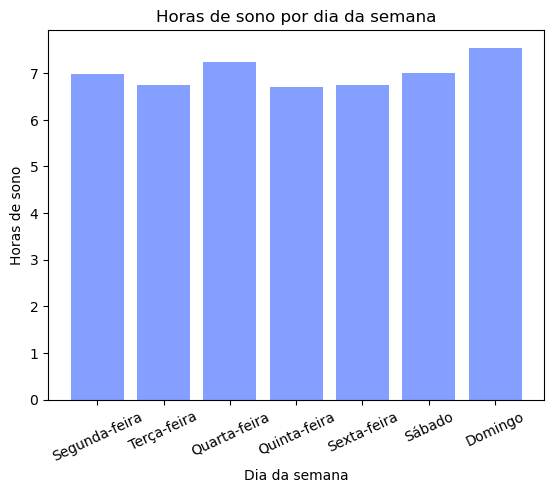

In [16]:
sleep_day['ActivityDay'] = pd.to_datetime(sleep_day['SleepDay'])
sleep_day['DayOfWeek'] = pd.DatetimeIndex(sleep_day['ActivityDay']).dayofweek
weekday_sleep = sleep_day.groupby('DayOfWeek')['TotalMinutesAsleep'].agg('mean')
plt.bar(weekday_sleep.index,weekday_sleep.values/60,color='#849FFF')
plt.xticks(weekday_sleep.index,['Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira','Sexta-feira','Sábado','Domingo'],rotation=25)
plt.title('Horas de sono por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Horas de sono')
plt.show()


16. Plotamos um gráfico com as horas de sono e os dias da semana para vermos como os usuários dormem ao longo da semana. Vemos que a média é aproximadamente 7 horas de sono por dia, tendo um aumento no Domingo e na Quarta-feira. 

In [17]:
print(len(sleep_day['Id'].unique()))
print(len(daily_inte['Id'].unique()))

24
33


17. Agora iremos analisar os dados de sono em relação ao tempo ocioso, primeiramente verificamos que temos 24 dados únicos de sono ('sleep_day') enquanto temos 33 dados únicos de atividades ('daily_inte'). Dados suficientes para fazermos a análise nessa amostragem, primeiro iremos mesclar as duas tabelas e armazenar em 'sleep_sede', e depois plotaremos o gráfico.

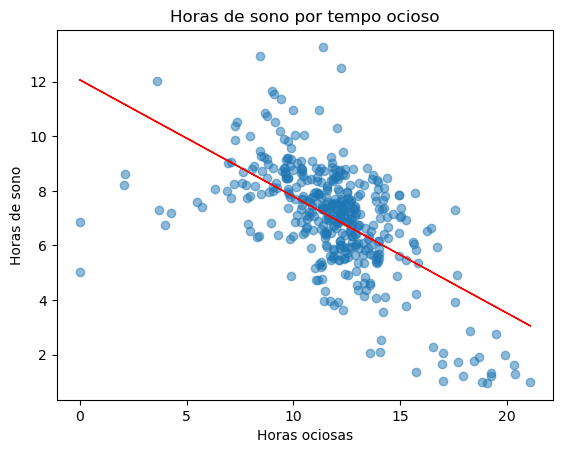

In [18]:
sleep_sede = sleep_day.merge(daily_inte,on=['Id','ActivityDay'],how='inner')
x_4 = sleep_sede['SedentaryMinutes']/60
y_4 = sleep_sede['TotalMinutesAsleep']/60
plt.scatter(x_4, y_4,alpha=0.5)
h, g = np.polyfit(x_4, y_4, deg=1)                                                                                              
plt.plot(x_4, g + h * x_4, color="red", lw=1)
plt.xlabel('Horas ociosas')
plt.ylabel('Horas de sono')
plt.title('Horas de sono por tempo ocioso')
plt.show()

18. O gráfico acima nos mostra uma correlação negativa entre as variáveis, como podemos observar na linha vermelha. Logo, poderemos dizer que quanto mais horas ociosas, menos tempo de sono o usuário tem. Lembrando que essa informação não pode ser afirmada como causalidade, precisaríamos de mais dados e informações para dizer que uma causa a outra.

#### Conclusão

Abordaremos cada questão separadamente:

**1.	Quais são algumas das tendências no uso de dispositivos inteligentes?**

Pessoas que utilizam dispositivos inteligentes tendem a ter ou querer estar mais saudáveis, e os dispositivos inteligentes, ajudam a monitorar os dados corporais para que os usuários consigam compreender aquilo que precisam ajustar, melhorar ou diminuir para atingir seus objetivos.

Podemos observar que há mais dados em relação a passos do que em registros de peso, por exemplo. Dados que tendem a ser inseridos pelo próprio usuário são em menor quantidade, logo, dados que são coletados passivamente pelos dispositivos são mais abrangentes, no caso dessa amostra de dados, com a mesma ideia podemos observar que há menos dados de sono, muitas pessoas podem achar incômodo dormir com o dispositivo. Porém não podemos afirmar pois precisaríamos de mais dados e mais pesquisa para podemos chegar a essa conclusão de forma concetra.

**2.	Como essas tendências podem se aplicar aos clientes da Bellabeat?**

Pelas tendências de alguns gráficos podemos presumir que os usuários do dispositivo inteligente são pessoas com uma vida ativa, vimos que a maior porcentagem de atividade é a leve('LightlyActiveMinutes'), que abrange as movimentações do dia a dia (emprego, escola, afazeres, lazer) e as atividades moderada('FairlyActiveMinutes') e intensa('VeryActiveMinutes) são em menor porcentagem, podendo indicar uma ida constante a academia ou alguma atividade de maior intensidade.

Vimos gráficos que demonstram correlação positiva entre queima de calorias e passos, ou seja quanto mais passos os usuários dão, mais calorias perdem. E também vimos a correlação negativa entre horas de sono e horas ociosas, quanto mais tempo ocioso, menos horas de sono os usuários tem.

**3.	Como essas tendências podem ajudar a influenciar a estratégia de marketing da Bellabeat?**

As tendências podem ajudar a criar campanhas de marketing voltadas para melhora de sono por exemplo, incentivando os usuários da Bellabet a terem menos tempo ocioso durante o dia. Ou aumentar atividade física dependendo do objetivo do usuário, perda de peso, aumento de peso e afins. Criar alertas para os usuários de quantidade de passos, calorias perdidas e pontuações de sono para melhorar a saúde do mesmo. 

O marketing principal seria voltado para a qualidade de vida e como podemos adquiri-la. Ajudando o usuário a entender os próprios dados e como melhorá-los, dependendo do objetivo específico visando a saúde.

Os dispositivos inteligentes são voltados para pessoas ativas ou que querem ser mais ativas e saudáveis. Então o marketing tem que ser feito em volta dessas áreas, em sites, páginas voltadas para atividade física e saúde além de propagandas em locais próximos a academias, postos de saúde, hospitais, clínicas estéticas e áreas de lazer ao ar livre, ou que tenham algum tipo de atividade.